In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_hist_variaveis(conjunto, dataframe, i=0, legend=None, title='distribuição das variáveis numéricas'):
    total_plots = len(conjunto)
    fig = plt.figure(figsize=(20,6*total_plots))
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    fig.suptitle(title, y=0.895)


    for var in conjunto:
        mean = dataframe[var].mean()
        max = dataframe[var].max()
        first_quartile = dataframe[var].quantile(0.25)
        third_quartile = dataframe[var].quantile(0.75)
        ax = fig.add_subplot(total_plots, 2, i+1)
        if legend is not None:
            sns.histplot(x=dataframe[var], ax=ax, color='#435058', hue=dataframe[legend], alpha=0.5, kde=True)
        else:
            sns.histplot(x=dataframe[var], ax=ax, color='#435058', alpha=0.5,  kde=True)
        ax.set_title(var)
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.axvline(mean, color='r', linestyle='--')
        ax.axvline(first_quartile, color='g', linestyle='--')
        ax.axvline(third_quartile, color='g', linestyle='--')
        ax.text(ax.get_xlim()[0], ax.get_ylim()[1]+((ax.get_ylim()[1])/11), 'Média: {:.2f}'.format(mean))
        ax.text(ax.get_xlim()[0], ax.get_ylim()[1]+((ax.get_ylim()[1])/20), 'Máximo: {:.2f}'.format(max))
        
        i += 1

def plot_bar_variaveis(conjunto, dataframe, x_var, i=0, title='distribuição das variáveis numéricas', legend=None):
    total_plots = len(conjunto)
    fig = plt.figure(figsize=(20,6*total_plots))
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    fig.suptitle(title, y=0.895)



    for var in conjunto:
        ax = fig.add_subplot(total_plots, 2, i+1)
        #dataframe = dataframe.groupby(x_var).mean()

        if legend is not None:
            sns.barplot(y=dataframe[var], ax=ax, x=dataframe[x_var], hue=dataframe[legend])
        else:
            sns.barplot(y=dataframe[var], ax=ax, x=dataframe[x_var])
            
        ax.set_title(var)
        ax.set_ylabel('')
        ax.set_xlabel('')
        i += 1

def create_log_variable (conjunto, dataframe):
    for var in conjunto:
        dataframe[var+'_log'] = dataframe[var].apply(lambda x: np.log(x) if x > 0 else 0)
    return dataframe

def normalization_test (conjunto, dataframe, alpha=0.05):
    for col in conjunto:
        statistic, p_value = stats.shapiro(dataframe[col])
        if p_value > alpha:
            print(col, 'H0: Normal distribution')
        else:
            print(col, 'H1: Non-normal distribution')

In [3]:
dir_price = 'price_data.csv'
dir_client = 'client_data.csv'

df_price = pd.read_csv(dir_price)
df_client = pd.read_csv(dir_client)

In [4]:
df_client['id'].nunique()
df_client.shape

(14606, 26)

In [5]:
df_price['id'].nunique()
df_price.shape

(193002, 8)

In [6]:
df = df_client.merge(df_price, how='inner', on='id')

In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_r

In [8]:
df = df.drop_duplicates()

In [10]:
for var in ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']:
    df[var] = pd.to_datetime(df[var], format='%Y-%m-%d')

In [66]:
date_vars = df.select_dtypes(include=[np.datetime64]).columns.to_list()
num_vars = df.select_dtypes(include=[np.number]).columns.to_list()

df_dates = df[date_vars]

<AxesSubplot: xlabel='churn', ylabel='count'>

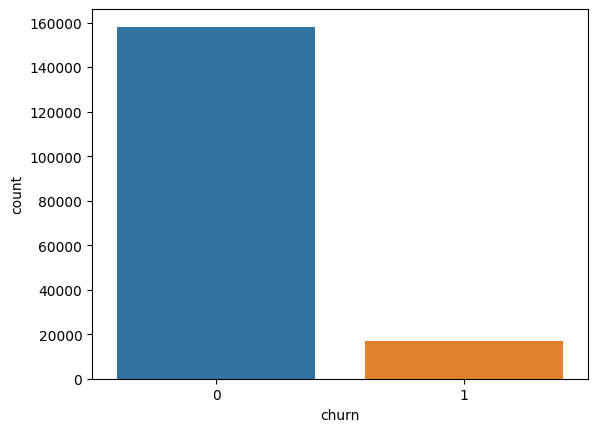

In [12]:
sns.countplot(data=df, x='churn')


<AxesSubplot: xlabel='date_activ,date_activ'>

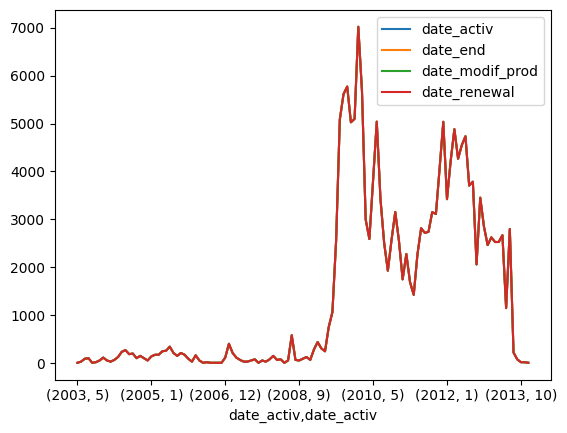

In [71]:
df_dates.groupby([df_dates['date_activ'].dt.year, df_dates['date_activ'].dt.month]).count().plot()

In [ ]:
fig, ax = plt.subplots()
for column in ['date_activ']:
    ax.plot(monthly_counts.index, monthly_counts[column], label=column)

In [50]:
assinaturas_ano = df['date_activ'].groupby([df['date_activ'].dt.year, df['date_activ'].dt.month]).count()
encerramentos_ano = df['date_end'].groupby([df['date_end'].dt.year, df['date_end'].dt.month]).count()

<AxesSubplot: xlabel='date_end,date_end'>

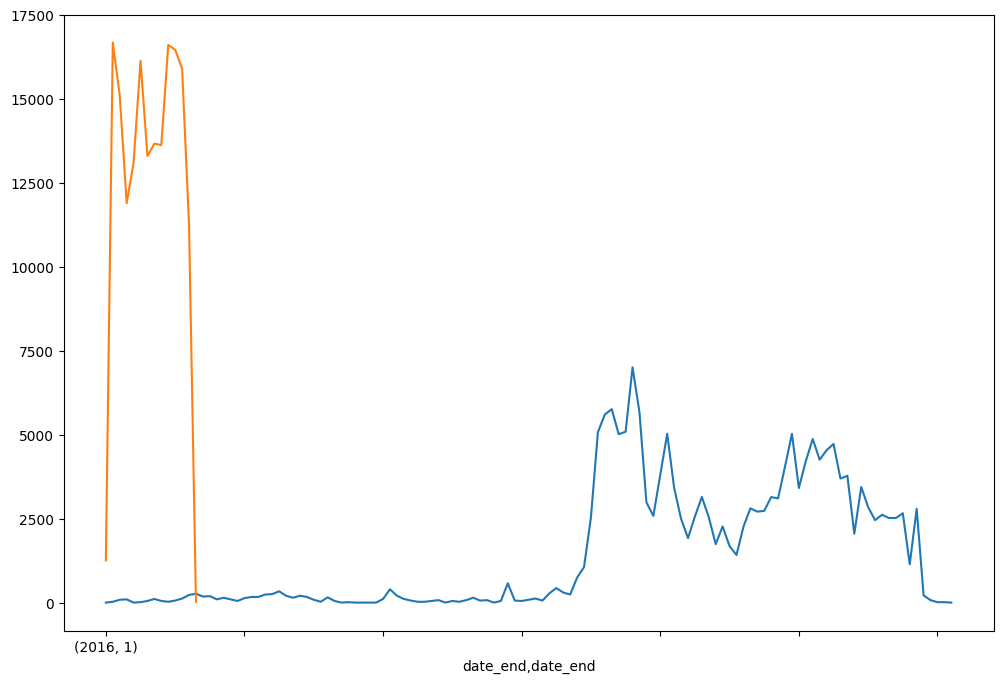

In [56]:
fig = plt.figure(figsize=(12, 8))
assinaturas_ano.plot()
encerramentos_ano.plot()

<AxesSubplot: xlabel='date_end,date_end'>

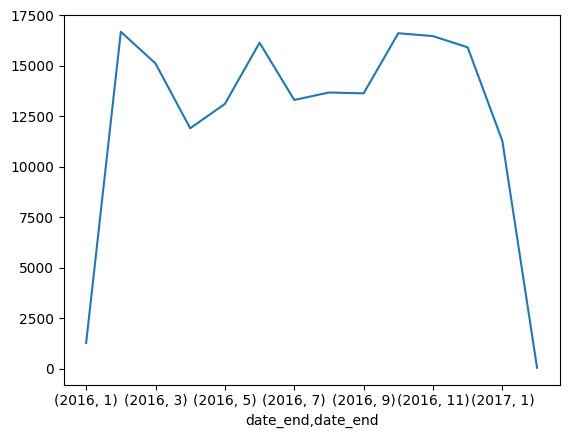

In [51]:
encerramentos_ano.plot()

In [17]:
date_df.set_index('date_activ', inplace=True)

<AxesSubplot: xlabel='date_activ'>

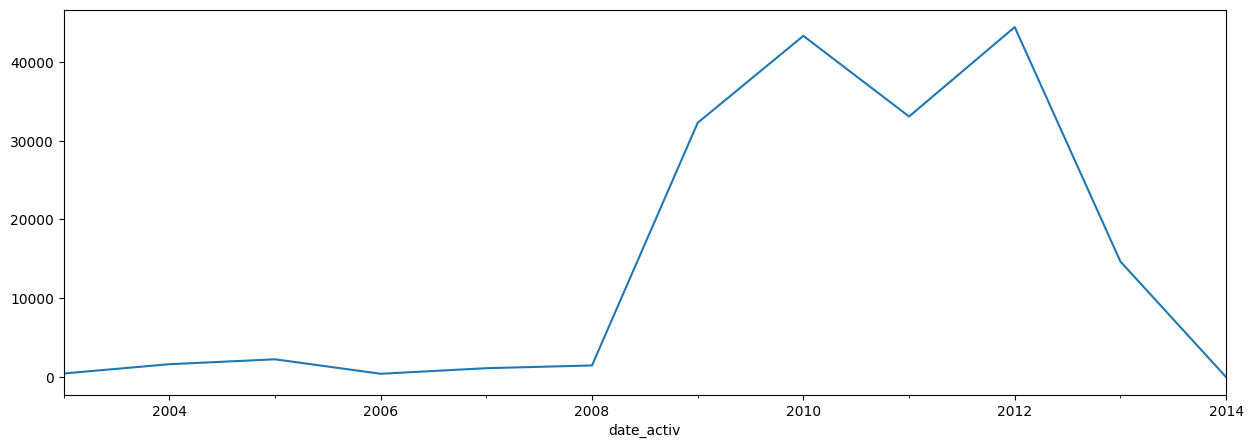

In [22]:
date_df['date_end'].resample('1Y').count().plot(figsize=(15, 5))

<AxesSubplot: xlabel='date_activ'>

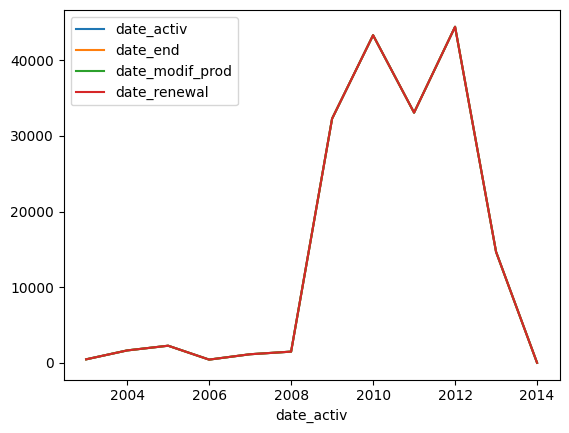

In [49]:
date_df.groupby(df["date_activ"].dt.year).count().plot(kind="line")

<AxesSubplot: xlabel='date_activ'>

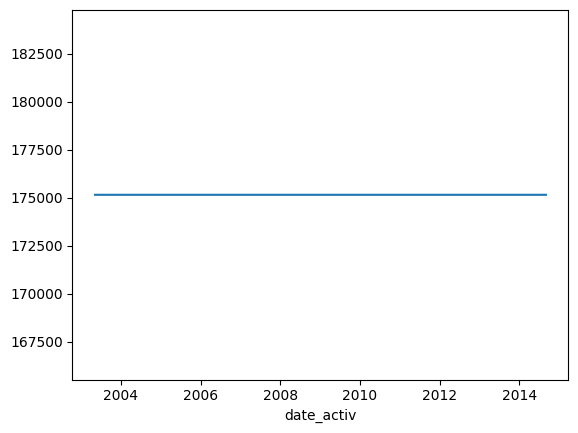

In [45]:
sns.lineplot(x=date_df['date_activ'], y=date_df['date_activ'].count(), data=date_df)

In [33]:
date_df

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,margin_net_pow_ele_log,nb_prod_act_log,net_margin_log,pow_max_log,price_off_peak_var_log,price_peak_var_log,price_mid_peak_var_log,price_off_peak_fix_log,price_peak_fix_log,price_mid_peak_fix_log
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,3.236323,0.693147,6.520606,3.776157,-2.071664,-2.269199,-2.637554,3.702930,3.192104,2.786639
1,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,3.236323,0.693147,6.520606,3.776157,-2.071664,-2.269199,-2.637554,3.702930,3.192104,2.786639
2,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,3.236323,0.693147,6.520606,3.776157,-2.071664,-2.269199,-2.637554,3.702930,3.192104,2.786638
3,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,3.236323,0.693147,6.520606,3.776157,-2.071664,-2.269199,-2.637554,3.702930,3.192104,2.786638
4,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,3.236323,0.693147,6.520606,3.776157,-2.071664,-2.269199,-2.637554,3.702930,3.192104,2.786638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,8730,0,0,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,...,2.471484,0.000000,4.567884,2.341036,-1.795996,-2.442940,0.000000,3.790238,0.000000,0.000000
175145,8730,0,0,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,...,2.471484,0.000000,4.567884,2.341036,-1.795996,-2.442940,0.000000,3.790238,0.000000,0.000000
175146,8730,0,0,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,...,2.471484,0.000000,4.567884,2.341036,-1.795996,-2.442940,0.000000,3.790238,0.000000,0.000000
175147,8730,0,0,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,...,2.471484,0.000000,4.567884,2.341036,-1.795996,-2.442940,0.000000,3.790238,0.000000,0.000000


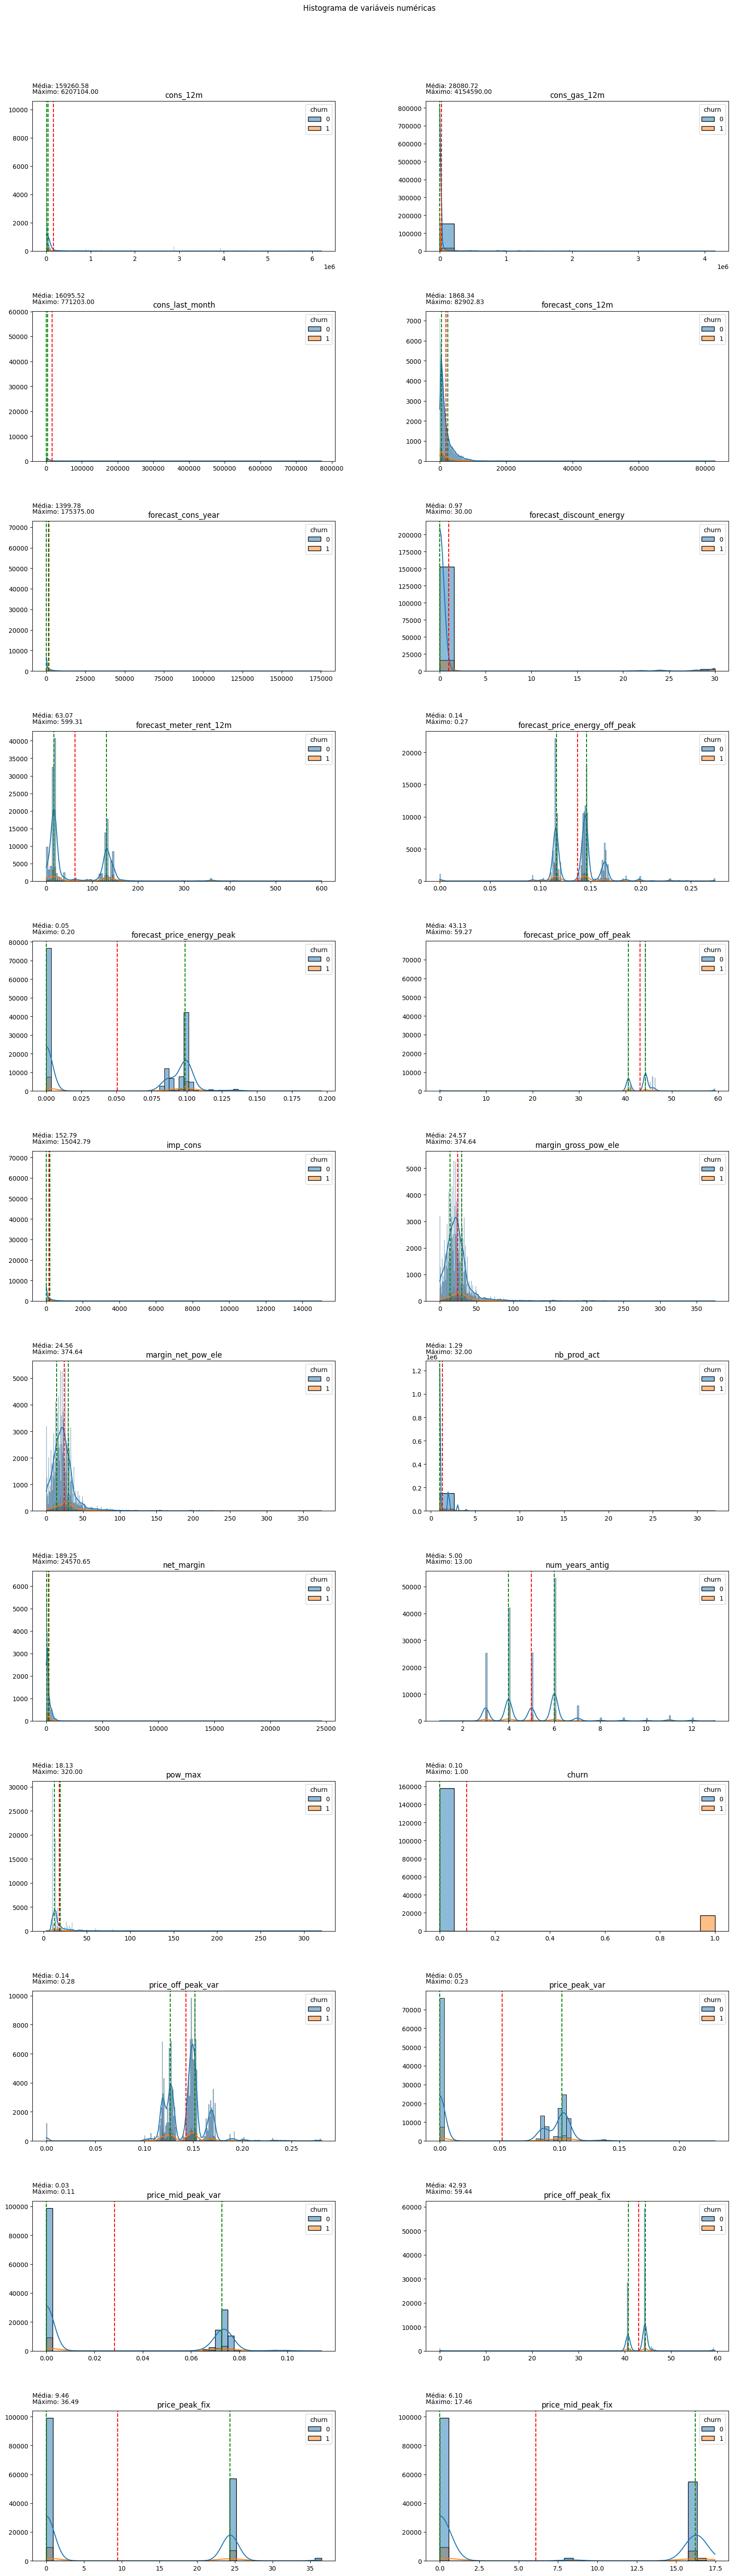

In [12]:
plot_hist_variaveis(conjunto=num_vars, title='Histograma de variáveis numéricas', dataframe=df, legend='churn')

In [13]:
vars_to_remove = ['num_years_antig', 'churn']
[num_vars.remove(var) for var in vars_to_remove]

[None, None]

In [14]:
create_log_variable(conjunto=num_vars, dataframe=df)
log_vars = []
[log_vars.append(var) for var in df.columns.to_list() if '_log' in var]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

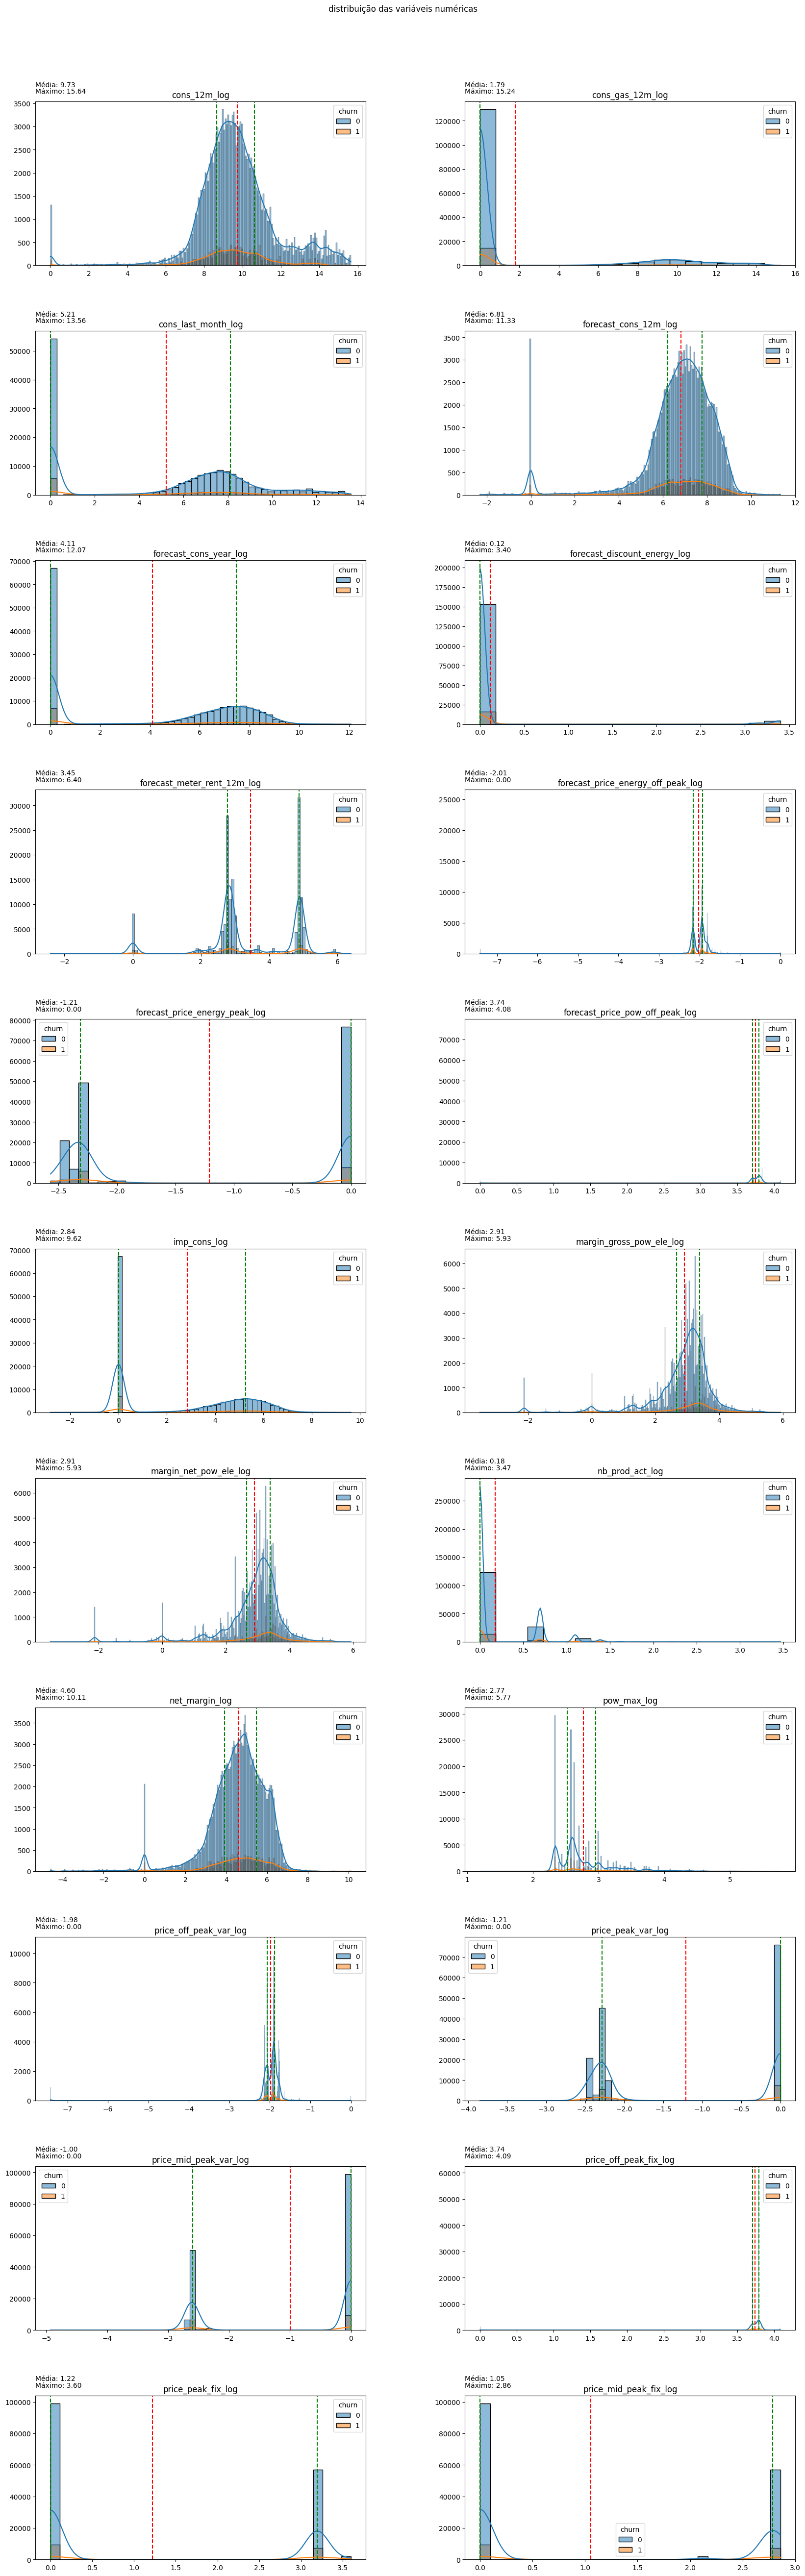

In [15]:
plot_hist_variaveis(conjunto=log_vars, dataframe=df, legend='churn')

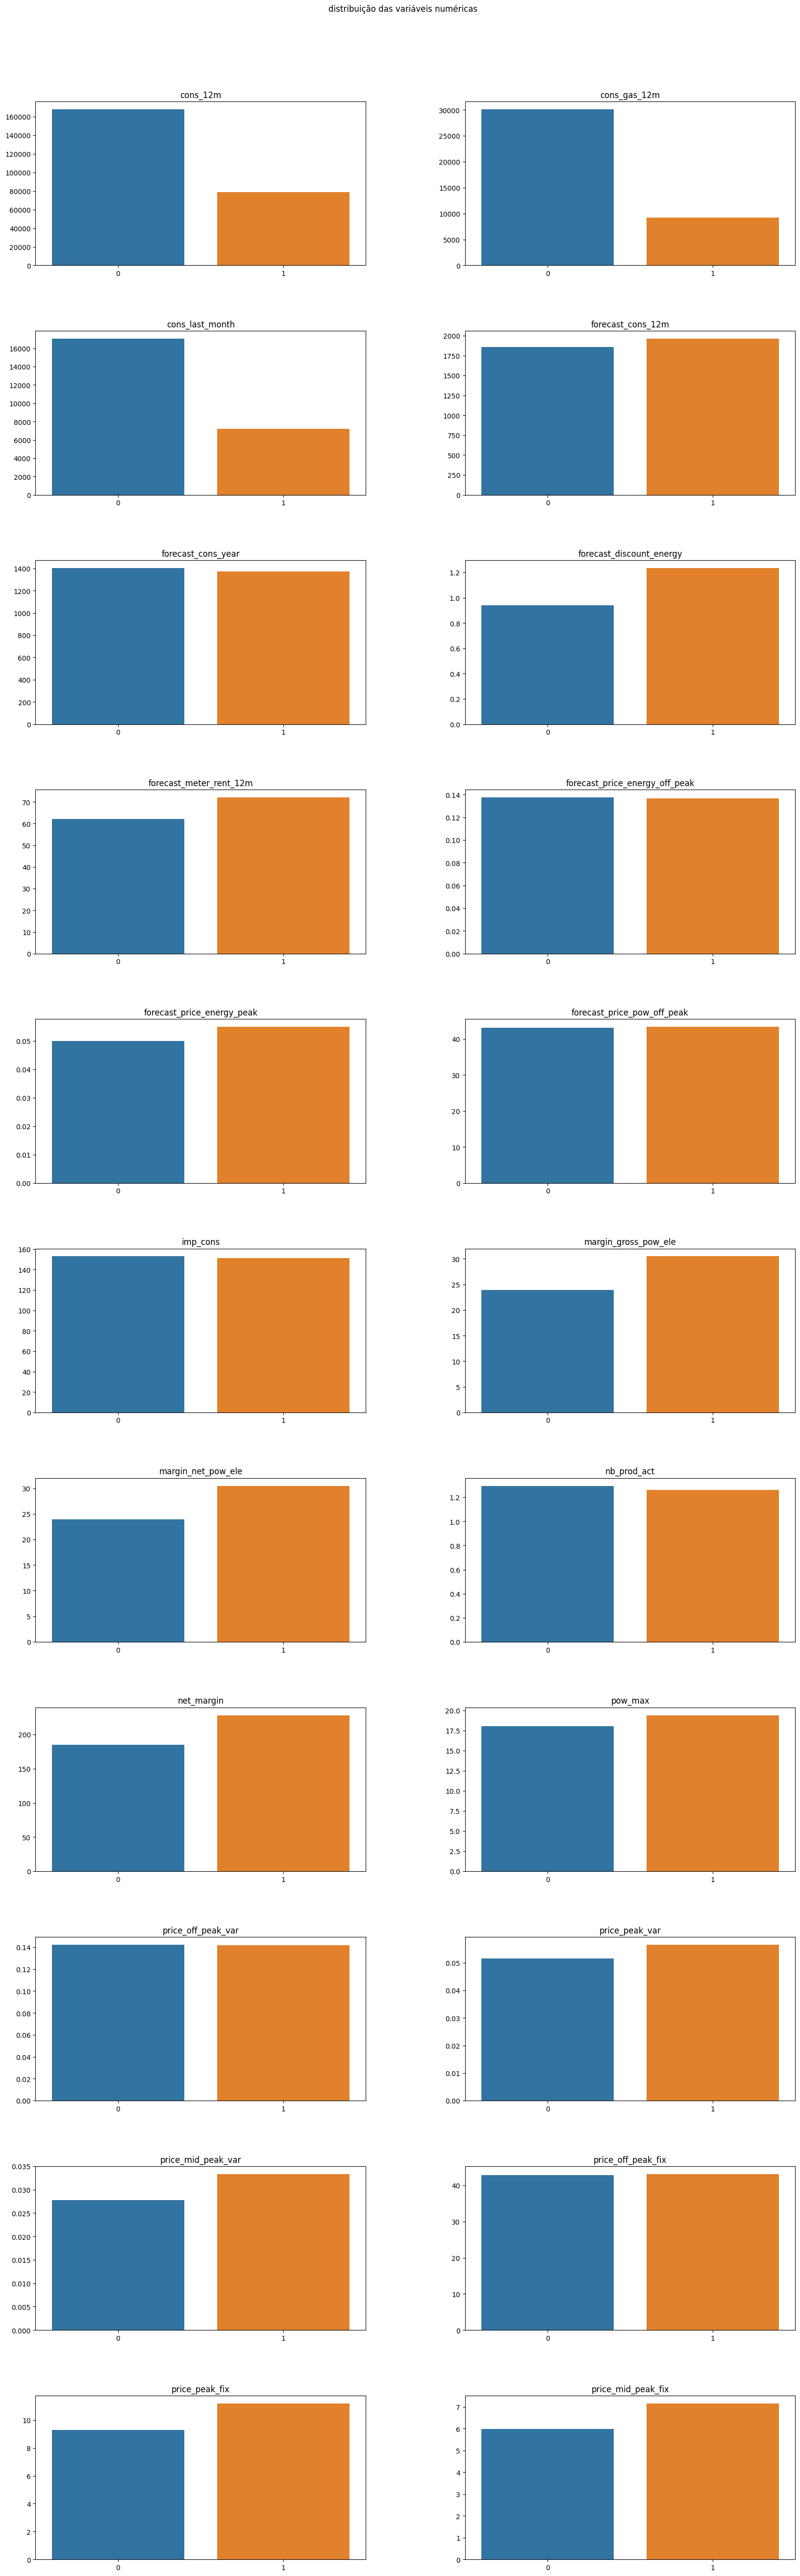

In [16]:
df_mean = df.groupby('churn', as_index=False).mean()
plot_bar_variaveis(conjunto=num_vars, dataframe=df_mean, x_var='churn')

In [17]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'cons_12m_log', 'cons_gas_12m_log',
       'cons_last_month_log', 'forecast_cons_12m_log',
       'forecast_cons_year_log', 'forecast_discount_energy_log',
       'forecast_meter_rent_12m_log', 'forecast_price_energy_off_peak_log',
       'forecast_price_energy_peak_log', 'forecast_price_pow_off_peak_log',
       'im

In [20]:
sns.pairplot(df, hue='churn')

KeyboardInterrupt: 